# Исследование надежности заемщиков

## Откроем таблицу и изучим общую информацию о данных

In [4]:
# импорт необходимых библиотек
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

In [5]:
# чтение файла
try:
    data = pd.read_csv('D:/Practicum/Аналитика данных/Предобработка данных/Проект/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [6]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

Выведем количество пропущенных значений для каждого столбца.

In [8]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце обработаем на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [9]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода `abs()`.

In [10]:
data['days_employed'] = data['days_employed'].abs()

In [11]:
# для каждого типа занятости выведем медианное значение трудового стажа days_employed в днях
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть, тем более этот столбец не понадобится для исследования.

In [12]:
# выведем перечень уникальных значений столбца children
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`

In [13]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [14]:
# ещё раз выведем перечень уникальных значений столбца children, чтобы убедиться, что артефакты удалены
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

In [15]:
# Заполним пропуски в столбце days_employed медианными значениями для каждого типа занятости income_type
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [16]:
# eбедимся, что все пропуски заполнены
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру. Проверим остальные столбцы.

In [17]:
data['education'] = data['education'].str.lower()

In [18]:
# удаление дубликатов
data = data.drop_duplicates()

### Категоризация данных

На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [19]:
# Функция для категоризации граждан по заработку
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [20]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [21]:
# выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [22]:
# функцмя для категоризации цели кредита
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [23]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Исследование данных

#### Зависимость между количеством детей и возвратом кредита в срок

Для понимания зависимости между количеством детей и возвратом кредита в срок необходимо найти отношение количества невозвращенных кредитов к общему количеству для каждой категории заемщиков.

Разберем для наглядности пример по заемщиками, у которых нет детей. Для начала найдем общее количество людей, у которых нет детей.

In [24]:
data.loc[data['children'] == 0]['debt'].count()

14091

Далее найдем количество заещиков с просрочками. Так как в столбце 'debt' обозначены единицой люди, не вернувшие кредит в срок, то найдя сумму по этому столбцу как раз и узнаем их количество.

In [25]:
data.loc[data['children'] == 0]['debt'].sum()

1063

Чтобы найти отношение делим одно на другое. Чем больше получаем значение, тем хуже эта категория граждан возвращает кредит.

In [26]:
data.loc[data['children'] == 0]['debt'].sum() / data.loc[data['children'] == 0]['debt'].count()

0.07543822297920659

Те же отношение необходимо найти для каждой категории заещиков. Несложно заметить, что делим сумму слагаемых на общее их количество, а это есть среднее арифметическое.

Для удобства отображения создадим сводную таблицу.

In [27]:
data_pivot = data.pivot_table(index='children',values='debt', aggfunc='mean')
data_pivot

,debt
children,
0,0.075438
1,0.092346
2,0.094542
3,0.081818
4,0.097561
5,0.000000


Для того чтобы проще было оценивать результат визуализируем каждый отдельный столбец. Для этого построим столбчатую диаграмму. По горизонтальной оси указано количество детей, по вертикальной доля невозврата кредита в срок.

<AxesSubplot:xlabel='children', ylabel='debt'>

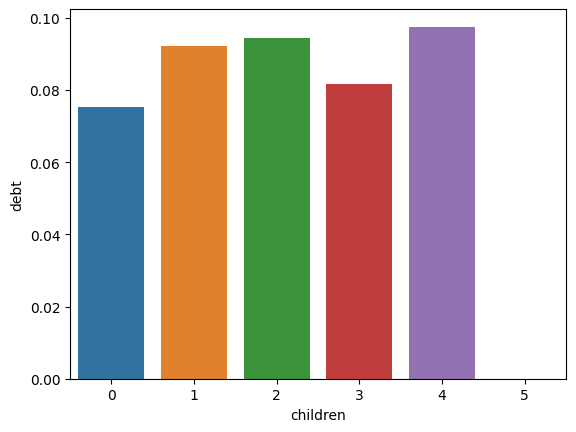

In [28]:
seaborn.barplot(x = data_pivot.index, y = data_pivot['debt'], data = data_pivot)

Аналогичным способом ищется зависимость по другим критериям. Чтобы не считать каждый раз одно и то же имеет смысла создать функцию и далее ее вызывать для нужного столбца.

In [29]:
def dependence(row, rotat=0):
    data_pivot = data.pivot_table(index = row, values = 'debt', aggfunc = 'mean')
    seaborn.barplot(x = data_pivot.index, y = data_pivot['debt'], data = data_pivot)
    plt.xticks(rotation=rotat)

Найдем зависимость возврата кредита от количества детей через функцию.

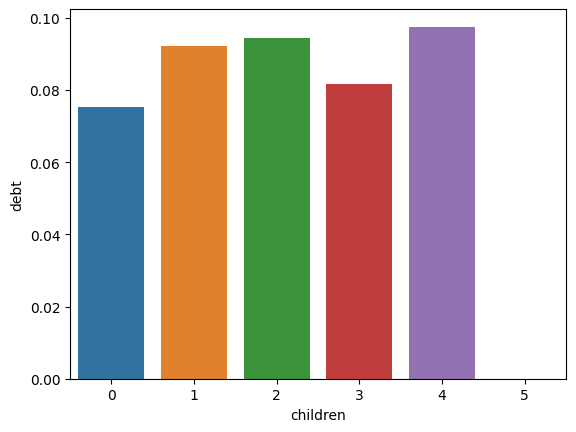

In [30]:
dependence('children')

**Вывод:** Люди, у которых 5 детей все до единого вовратили кредит вовремя, но нельзя утверждать, что будет то же самое и с другими заемщиками, так как слишком маленькая выборка для людей с 5 детьми. Лучше всего возвращают граждане без детей, видимо так проще планировать свой бюджет. Чуть хуже возвращают люди с тремя детьми, скорее всего получая статус многодетных, они получают льготы и проще расплатиться с кредитом. Люди с количеством детей: 1, 2 и 4 примерно одинаково задерживают выплаты, в среднем от 9.2 до 9.8 процентов от общего количества в той же категории.

#### Зависимость между семейным положением и возвратом кредита в срок

Найдем зависимость возврата кредита от семейного положения.

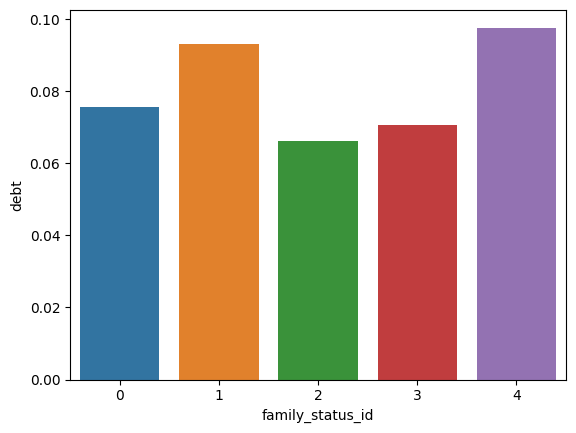

In [31]:
dependence('family_status_id')

**Вывод:** Лучше всего возвращают кредит люди, которые потеряли вторую половинку из-за их гибели. Чуть хуже возвращают вовремя разведенные. Следом идут женатые/замужние с процентом невозврата около 7.5. Хуже всего возвращают кредит вовремя не женатые/ не замужние или живущие в гражданском браке.

#### Зависимость между уровнем дохода и возвратом кредита в срок

Найдем зависимость возврата кредита от уровня дохода.

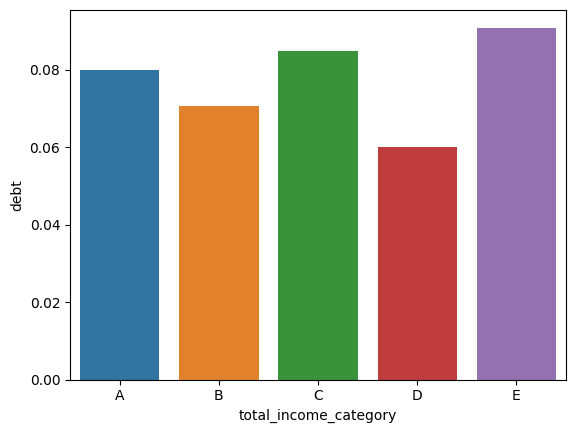

In [32]:
dependence('total_income_category')

**Вывод:** Делать выводы по гражданам с самыми большими и самыми маленькими доходами в данном случае не совсем корректно, так как слишком мало по ним данных. Что касается остальных, то чаще всего задерживают выплату люди со среднем доходом(з\п от 50 000 до 200 000(категория C)). В районе 7 процентов имеют просрочку люди с зарплатой от 200 000 до 1 000 000(категория B). Лучше всех выплачивают кредит в срок имебщие зарплату в диапазоне от 30 000 до 50 000(категория D).

#### Как разные цели кредита влияют на его возврат в срок

Найдем зависимость возврата кредита от цели кредитования.

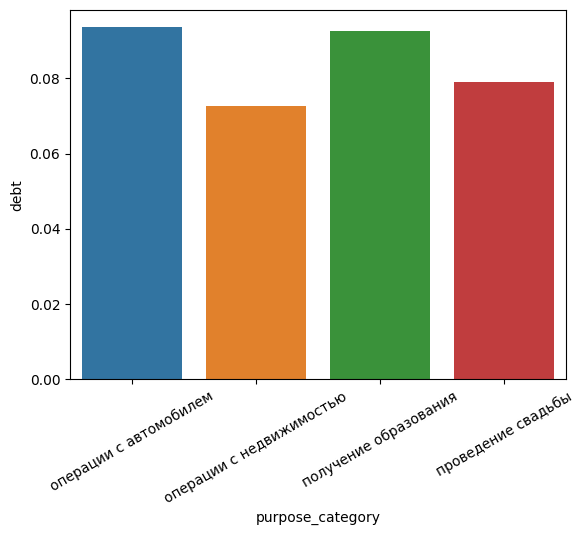

In [33]:
dependence('purpose_category', 30)

**Вывод:** Лучше всего возвращают те, кто взял кредит на недвижимость, немного отстают от них те, кто взял кредит на образование. Хуже всего и примерно одинаково выплачивают те, кто взял кредит на свадьбу и на покупку автомобиля.

#### Возможные причины появления пропусков в исходных данных

Изучив исходные данные можно заметить, что пропуски есть только в двух столбцах(трудовой стаж и ежемесячный доход) и кол-во пропусков в этих столбцах совпадает. Если посмотреть еще более внимательно, то видно, что пропуски в этих столбцах в одинаковых строчках. Таким образом можно сделать вывод: банк выдал кредит клиенту без подтверждения его дохода и занятости.

#### Почему заполнить пропуски медианным значением — лучшее решение для количественных переменных

Среднее значение некорректно характеризует данные, когда некоторые значения сильно выделяются среди большинства. Например, если взять уровень зарплаты для категории 'B'. Диапазон от 200 000 до 1 000 000, данные разнятся аж в пять раз, а не медиану не будет влиять такой бьльшой разброс.

## Итоги

Было проведено исследование, в котором выявлялась взаимосвязь между разными факторами и фактом погашения кредита в срок. Для разбора от заказчика была получена статистика о платежеспособности клиентов. Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Перед началом исследования были выбраны факторы, которые могут влиять на потенциальный возврат кредита в срок:
1. Количество детей
2. Семейное положение
3. Уровень дохода
4. Цель кредитования

В результате исследования получилось выявить следующие зависимости:

**Влияние фактора 1:**
Заемщики без детей являются более ответственными(7.5% невозврата), чем клиенты, у которых есть дети(1 ребенок - 9.2%, 2 ребенка - 9.5%). Для клиентов с 3 и более детьми слишком мало данных, чтобы сделать какие - либо выводы.

Рекомендация: провести дополнительное исследование с многодетными заемщиками

**Влияние фактора 2:**
Кредитному отделу следует с осторожностью относиться к клиентам, которые не состоят или не состояли в браке(9.3% - 9.8%). Узаконенные отношения (включая и бывшие отношения) ведут к более ответственному отношению к своим обязательствам. (6.6% - 7.5%) 

Рекомендация: разница между 2 списками пункта порядка 2.5%, поэтому я бы не рекомендовал наделять этой зависимости высокий вес при принятии решения, однако учитывать однозначно стоит.

**Влияние фактора 3:**
Чаще всего задерживают выплату люди со среднем доходом(катеория C - 8.5%). Категория B - 7.1%, категория D - 6%. По заемщикам категорий A и E сделать выводы невозмонжо, так как слишком мало ланных. Также в столбце по доходам клиентов было множество пропусков, что также может влиять на исследование.

Рекомендации: провести дополнительное исследование.

**Влияние фактора 4:**
7.3% - доля просроченных кредитов,  целью которых были операции с недвижимостью
7.9% - доля просроченных кредитов,  целью которых были проведение свадьбы
9.3% - доля просроченных кредитов,  целью которых были операции с автомобилем
9.3% - доля просроченных кредитов,  целью которых было получение образования

Рекомендация: разница между 2 списками пункта порядка 2%, поэтому я бы не рекомендовал наделять этой зависимости высокий вес при принятии решения, однако учитывать однозначно стоит.

Общие рекомендации:
1. Специалистам, которые занимаются построением модели кредитного скоринга, можно использовать зависимости по второму и четвертому фактору(семейное положение и цель кредита)
2. Необходимо собрать больше данных для выявления зависимостей по первому и третьему факторам.